In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"Bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Out of the 32 columns (attributes) : 12 are categorical (object type) and 20 are numeric (integer + float)
There are some missing(null) values in a few columns.
Seeing which are those.

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that there are alot of missing values in company column
Also the agent column as many missing values
There are also a few missing values in the country column (might be useful)

We will eleminate the agent and company column ultimately

<AxesSubplot:>

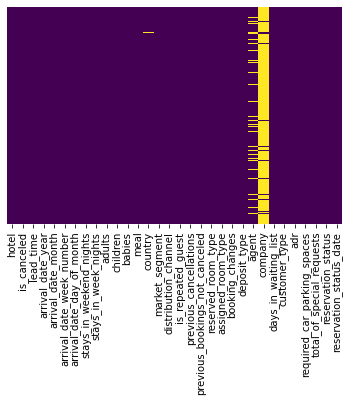

In [5]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.value_counts()

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   0                No Deposit    9.0    333.0    0                

In [8]:
df1=pd.DataFrame(df.iloc[:,:])
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
# eleminating the columns with missing data
df1.drop(['company', 'agent'], axis = 1, inplace=True)
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
df1.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [11]:
df1.dropna(axis=0, how='any', inplace=True)
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


<AxesSubplot:xlabel='hotel', ylabel='lead_time'>

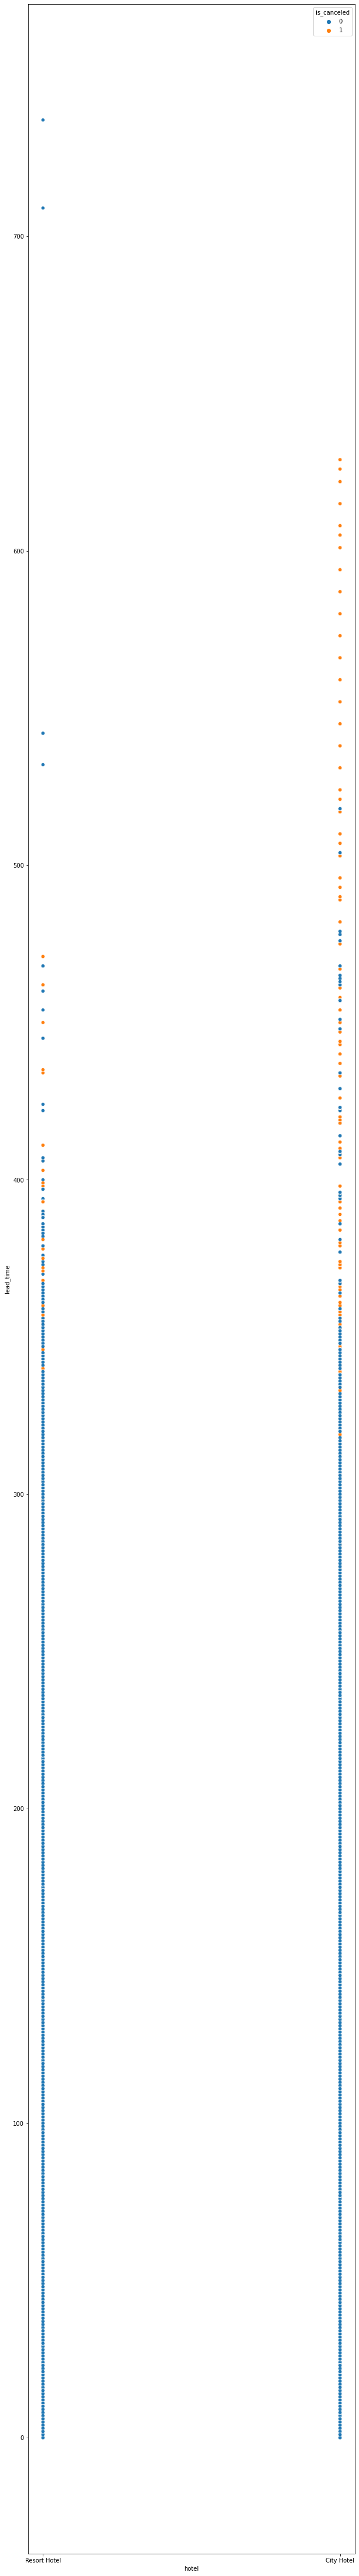

In [12]:
# Now comparing with the trarget
plt.figure(figsize=(10,80))
sns.scatterplot(x='hotel',y='lead_time', data=df1, hue='is_canceled')
# if leadtime is more than 300 hours people tend to cancel

In [13]:
lt_hr0= df1[df1['lead_time'] == 0]
lt_hr0["is_canceled"].value_counts()

0    5807
1     416
Name: is_canceled, dtype: int64

In [14]:
lt_day1=df1[df1['lead_time'] <= 24]
lt_day1["is_canceled"].value_counts()

0    28486
1     5671
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='previous_bookings_not_canceled'>

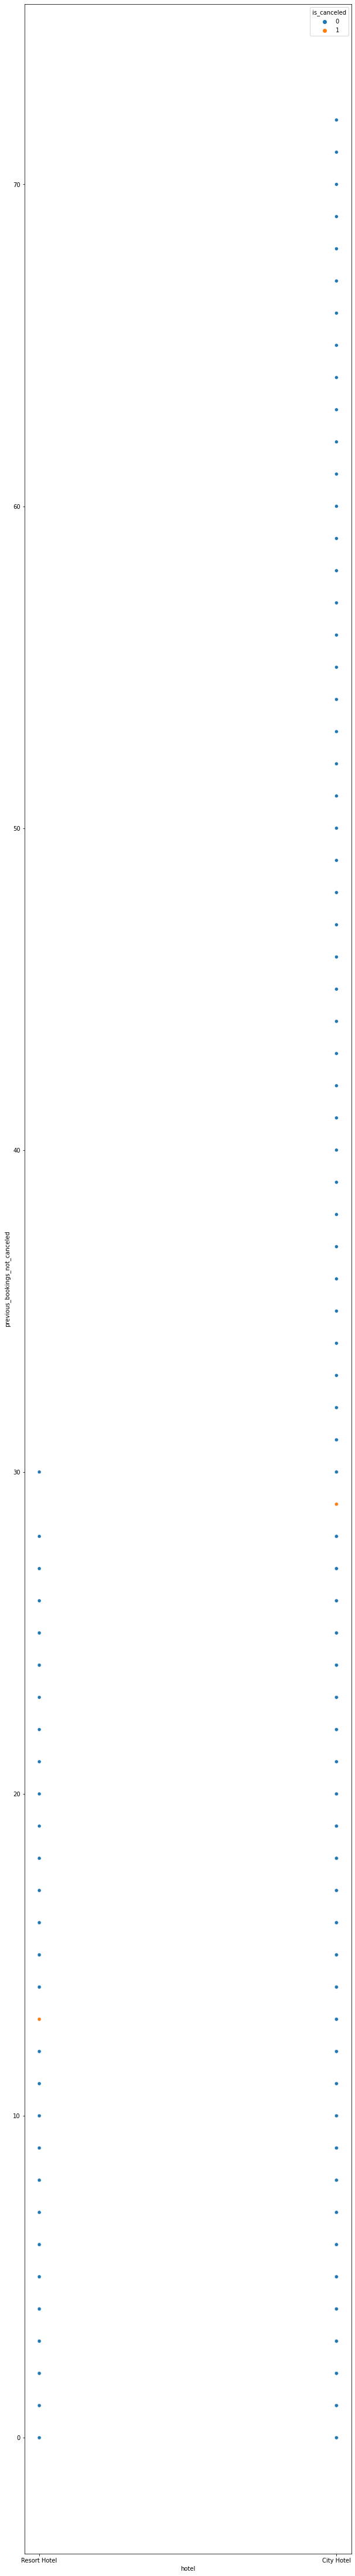

In [15]:
plt.figure(figsize=(10,80))
sns.scatterplot(x='hotel',y='previous_bookings_not_canceled', data=df1, hue='is_canceled')
# previous booking not canceled people tend to stay at the hotels

In [16]:
mnth_cancl=pd.DataFrame(df1[df1["is_canceled"]==1].groupby('arrival_date_month').count().is_canceled)
mnth_cancl

,is_canceled
arrival_date_month,
April,4512
August,5234
December,2363
February,2695
January,1806
July,4736
June,4534
March,3148
May,4677


In [17]:
mnth_tot_book=df1.groupby('arrival_date_month').arrival_date_month.value_counts()
mnth_tot_book

arrival_date_month  arrival_date_month
April               April                 11045
August              August                13852
December            December               6728
February            February               8012
January             January                5874
July                July                  12628
June                June                  10927
March               March                  9739
May                 May                   11779
November            November               6752
October             October               11095
September           September             10467
Name: arrival_date_month, dtype: int64

<AxesSubplot:xlabel='arrival_date_month'>

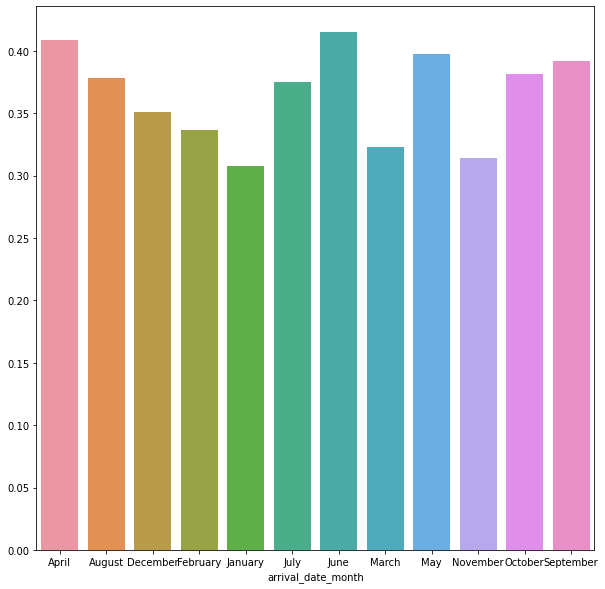

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x=mnth_cancl.index, y=mnth_cancl["is_canceled"]/mnth_tot_book)

# 40% of bookings get canceled during the rush months

In [19]:
year_cancl=pd.DataFrame(df1[df1["is_canceled"]==1].groupby('arrival_date_year').count().is_canceled)
year_cancl

,is_canceled
arrival_date_year,
2015,8106
2016,20313
2017,15734


In [20]:
year_tot_book=df1.groupby('arrival_date_year').arrival_date_year.value_counts()
year_tot_book

arrival_date_year  arrival_date_year
2015               2015                 21859
2016               2016                 56435
2017               2017                 40604
Name: arrival_date_year, dtype: int64

<AxesSubplot:xlabel='arrival_date_year'>

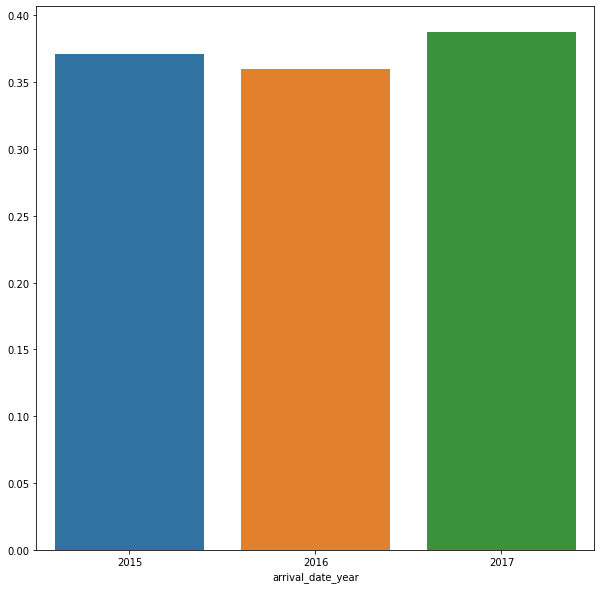

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=year_cancl.index, y=year_cancl["is_canceled"]/year_tot_book)

# 35% to 40% of bookings get cancled each year

In [22]:
dtday_cancl=pd.DataFrame(df1[df1["is_canceled"]==1].groupby('arrival_date_day_of_month').count().is_canceled)
dtday_cancl

,is_canceled
arrival_date_day_of_month,
1,1444
2,1384
3,1543
4,1349
5,1664
6,1274
7,1440
8,1647
9,1550


In [23]:
dtday_tot_book=df1.groupby('arrival_date_day_of_month').arrival_date_day_of_month.value_counts()
dtday_tot_book

arrival_date_day_of_month  arrival_date_day_of_month
1                          1                            3609
2                          2                            4037
3                          3                            3833
4                          4                            3747
5                          5                            4294
6                          6                            3813
7                          7                            3657
8                          8                            3908
9                          9                            4082
10                         10                           3554
11                         11                           3590
12                         12                           4077
13                         13                           3723
14                         14                           3799
15                         15                           4161
16                         16   

<AxesSubplot:xlabel='arrival_date_day_of_month'>

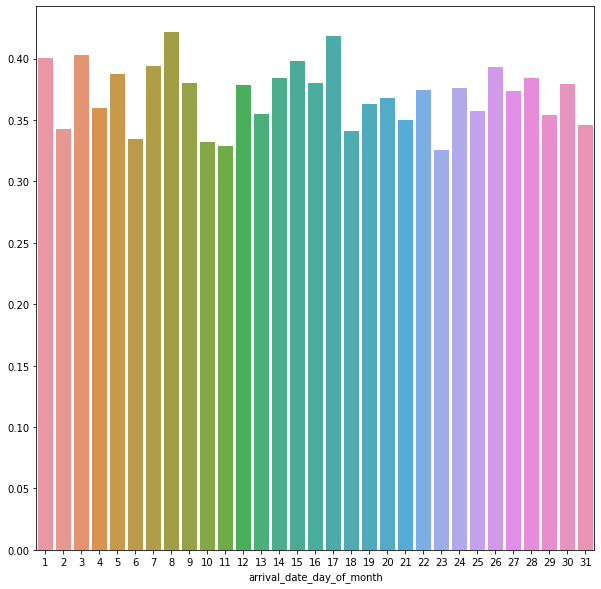

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=dtday_cancl.index, y=dtday_cancl["is_canceled"]/dtday_tot_book)

# most bookings get canceled on 1,2,8 & 17 which are more than 40%

In [50]:
bk_days=df1.loc[:,['stays_in_weekend_nights','stays_in_week_nights','is_canceled']]

bk_days

,stays_in_weekend_nights,stays_in_week_nights,is_canceled
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,2,0
...,...,...,...
119385,2,5,0
119386,2,5,0
119387,2,5,0
119388,2,5,0


In [51]:
bk_days_cncl=bk_days[bk_days['is_canceled']==1]
bk_days_cncl

,stays_in_weekend_nights,stays_in_week_nights,is_canceled
8,0,3,1
9,0,3,1
10,0,4,1
27,2,5,1
32,2,8,1
...,...,...,...
110280,0,0,1
111355,1,0,1
111924,0,1,1
111925,1,0,1


In [53]:
jj=bk_days_cncl[(bk_days_cncl['stays_in_weekend_nights'] !=0) & (bk_days_cncl['stays_in_week_nights'] == 0)]
jk=bk_days_cncl[(bk_days_cncl['stays_in_weekend_nights'] ==0) & (bk_days_cncl['stays_in_week_nights'] != 0)]
jl=bk_days_cncl[(bk_days_cncl['stays_in_weekend_nights'] !=0) & (bk_days_cncl['stays_in_week_nights'] != 0)]

print(jj)
print(jk)
print(jl)

        stays_in_weekend_nights  stays_in_week_nights  is_canceled
132                           1                     0            1
138                           1                     0            1
870                           1                     0            1
871                           2                     0            1
987                           2                     0            1
...                         ...                   ...          ...
98809                         1                     0            1
98810                         1                     0            1
108459                        2                     0            1
111355                        1                     0            1
111925                        1                     0            1

[1874 rows x 3 columns]
        stays_in_weekend_nights  stays_in_week_nights  is_canceled
8                             0                     3            1
9                             0      

In [56]:
wkend=jj['is_canceled'].sum()
wk=jk['is_canceled'].sum()
comb=jl['is_canceled'].sum()
lst=[wkend,wk,comb]

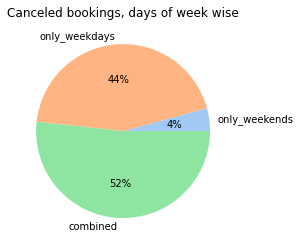

In [62]:
labels = ['only_weekends','only_weekdays','combined']
colors = sns.color_palette('pastel')[0:5]
plt.pie(lst, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Canceled bookings, days of week wise")
plt.show()

# People with combined week days and weekend bookings tend to cancle more

# Inferences from Descriptive and graphical analysis

1. There are more City Hotels available than Resort Hotels.
2. Approximately 1/3 bookings got canceled. (44224/(75166+44224) = 0.37041628277075134)
3. About 6.3k bookings are on the spot and aprroximately 34.5k bookings were on the day of arrival. If leadtime is more than 300 hours people tend to cancel.
4. Year of arrival are 2015,2016,2017 (given) and most customers visited in 2016. 35% to 40% of bookings get canceled each year
5. There is a rush in the months April to October and are lesser in November to March period. 40% of bookings get canceled during the rush months
6. Week number: nothing much.
7. Date of month: Most bookings get canceled on 1,2,8 & 17 which are more than 40%.
8. Weekend night stays: majority people dont stay on weekend nights.
9. Week night stays: majority people stay for 1 or 2 or 3 weekdays. People with combined week days and weekend bookings tend to cancle more.
10. Mostly there are bookings for 2 adults.
11. Mostly there are no bookings for children.
12. Majority have no booking for babies.
13. Meals BB (Bead and Breakfast) are majority followed by HB (Half Board) and SC (Self Catering).
14. Country has missing values, Bookings are from Portugal(PRT), Great Britain(GBR), France(FRA), Spain(ESP), Germany(DEU) Top 5 in  respective order.
15. Market Segment : Online Travel Agent (TA) on top followed by offline TA/TO and groups.
16. Distribution channel : TA/TO at top and Direct is next.
17. Repeted guest are only 3810 i.e. around 3% of total.
18. Some customers have done as many as 26 canclled bookings before the latest one. (Non-trustworthy customers) but majority have canclled 0 times.
19. Some customers have done as many as 72 non canclled bookings before the latest one. (Trustworthy customers) but majority have not canclled it 0 times.
20. Reserved room type : A is most preffered and L is least preffered.
21. Assigned room type : A is assigned to many people than reserved and L to lesser.
22. Booking changes : Majority people have no changes made but some ask changes as many as 18 times.
23. Most of the bookings are without deposits.
24. Aagent : Eliminating this column due to missing values but we can check if major cancelation happens from same agent.
25. Company : Eliminating this column due to missing values but we can check if major cancelation happens from same company.
26. Days in waiting list : Most of them got confirmed on the same day. We can check if people cancel if they had to wait more.
27. Customer type: Most are transient type.
28. Adr : ranges from -6.38 to 5400 (check the unit and why some values are negative).
29. Required car parking spaces : mostly 0 followed by 1.
30. Total of special requests : Mostly none followed by 1 but some have 5 special requests.
31. Reservation status : Many have checked in and departed.
32. Reservation status date  : Dates when the status was updated (no inference) club with the previouss coulumn and check.